# Import All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
Cust_df = pd.read_excel("Customer Retention Case Study Data.xlsx",sheet_name='Data')

# Review Data

In [3]:
Cust_df.shape

(54030, 10)

In [4]:
Cust_df.head()

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [5]:
Cust_df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

In [6]:
Cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   active_inactive_start  54030 non-null  object 
 6   active_inactive_end    54030 non-null  int64  
 7   num_products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [7]:
Cust_df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start     object
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

In [8]:
Cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,54030.0,40.772534,17.210781,2.00,25.0000,40.00,51.000,112.00
gross_income,54030.0,134196.672404,239721.455090,2336.01,68581.0725,101566.32,156253.755,28894395.51
num_credit_cards,54030.0,0.049880,0.217698,0.00,0.0000,0.00,0.000,1.00
active_inactive_end,54030.0,0.469073,0.499047,0.00,0.0000,0.00,1.000,1.00
num_products,54030.0,1.536017,1.578848,0.00,1.0000,1.00,2.000,13.00
num_loans,54030.0,0.009365,0.096320,0.00,0.0000,0.00,0.000,1.00
duration,54030.0,2913.936665,2027.956268,366.00,1118.0000,2039.50,4693.000,7909.00


<AxesSubplot:>

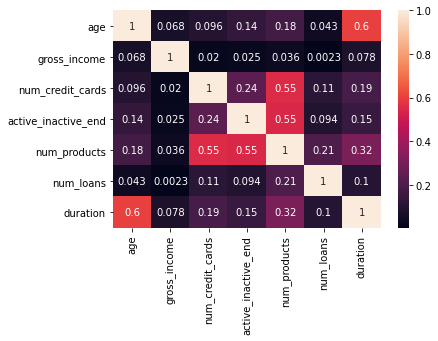

In [9]:
sns.heatmap(Cust_df.corr(),annot = True)

In [10]:
Cust_df['gender'].value_counts()

F    29681
M    24349
Name: gender, dtype: int64

In [11]:
Cust_df['segment'].nunique()

3

In [12]:
Cust_df['segment'].value_counts()

Individuals          32607
College_Graduated    18963
VIP                   2460
Name: segment, dtype: int64

Convert Data field 'active_inactive_start' to integer to enable analysis along with active_inactive_end. This data field was in string format in original source file and had to be converted to integer format using below code

In [13]:
Cust_df['active_inactive_start'] = Cust_df['active_inactive_start'].map({'I':0,'A':1})

In [14]:
Cust_df.head(10)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
5,F,32,37318.56,Individuals,0,1,1,4,0,699
6,F,43,131281.50,Individuals,0,1,0,1,0,5022
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427
9,M,26,27311.31,College_Graduated,0,0,1,1,0,1458


Final check on data if the active_inactive_start dtype changed to int64 and no null values existing 

In [15]:
Cust_df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start      int64
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

Calculate unique values of string variables

In [16]:
Cust_df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='age'>

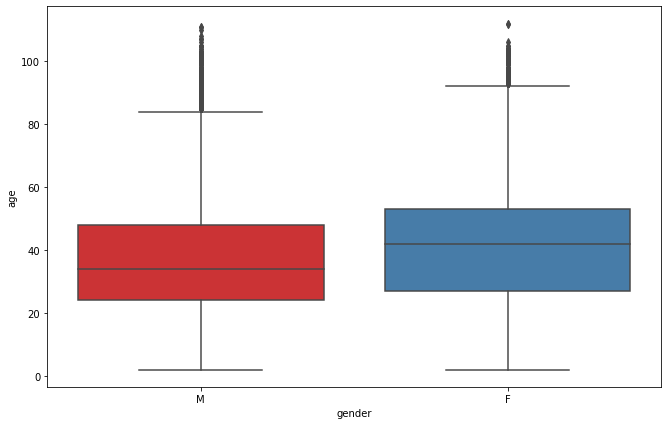

In [17]:
plt.figure(figsize=(11,7))
sns.boxplot(data = Cust_df, x='gender',y= 'age', palette='Set1')

# Data Exploration

Created new data field called 'New_Activations' to identify and separate clients basis their active in active status and start and end.

•	New Active: Customers who were inactive at start of period but turned active at end of 6 months of analysis period

•	Existing_Active: Customers who continued to remain active throughout 6 months of the analysis period

•	New_Inactive: Customers who were active at start of period but turned inactive at end of analysis period

•	Existing_Inactive: Customers who continued to remain inactive throughout the analysis period

In [18]:
Cust_df.loc[(Cust_df.active_inactive_start == 0) & (Cust_df.active_inactive_end == 1), 'New_Activations'] = 'New_Active'
Cust_df.loc[(Cust_df.active_inactive_start == 1) & (Cust_df.active_inactive_end == 1), 'New_Activations'] = 'Existing_Active'
Cust_df.loc[(Cust_df.active_inactive_start == 1) & (Cust_df.active_inactive_end == 0), 'New_Activations'] = 'New_Inactive'
Cust_df.loc[(Cust_df.active_inactive_start == 0) & (Cust_df.active_inactive_end == 0), 'New_Activations'] = 'Existing_Inactive'

In [19]:
Cust_df.head()

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,New_Activations
0,M,21,79070.91,Individuals,0,0,0,1,0,1035,Existing_Inactive
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097,Existing_Inactive
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866,New_Active
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440,Existing_Inactive
4,M,31,112975.17,Individuals,0,0,0,0,0,376,Existing_Inactive


Detailed Profile for New_Active Customers

In [20]:
Cust_df[Cust_df.New_Activations == 'New_Active'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2438.0,39.749385,17.645088,2.00,24.0000,37.0,50.000,105.00
gross_income,2438.0,123093.656862,93297.293190,9049.62,67119.6975,97501.5,148200.855,1174394.49
num_credit_cards,2438.0,0.001641,0.040480,0.00,0.0000,0.0,0.000,1.00
active_inactive_start,2438.0,0.000000,0.000000,0.00,0.0000,0.0,0.000,0.00
active_inactive_end,2438.0,1.000000,0.000000,1.00,1.0000,1.0,1.000,1.00
num_products,2438.0,1.277276,0.530003,0.00,1.0000,1.0,2.000,4.00
num_loans,2438.0,0.000000,0.000000,0.00,0.0000,0.0,0.000,0.00
duration,2438.0,2648.244053,1874.054211,366.00,1091.0000,1824.5,4283.000,7879.00


Detailed Profile for Existing Active Customers

In [21]:
Cust_df[Cust_df.New_Activations == 'Existing_Active'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,22906.0,43.677115,16.065042,2.00,32.0000,43.000,52.000,112.00
gross_income,22906.0,142333.733732,222933.483479,5340.93,74152.5075,110413.965,167160.345,13268621.28
num_credit_cards,22906.0,0.116782,0.321167,0.00,0.0000,0.000,0.000,1.00
active_inactive_start,22906.0,1.000000,0.000000,1.00,1.0000,1.000,1.000,1.00
active_inactive_end,22906.0,1.000000,0.000000,1.00,1.0000,1.000,1.000,1.00
num_products,22906.0,2.580634,1.879328,0.00,1.0000,2.000,3.000,13.00
num_loans,22906.0,0.020999,0.143383,0.00,0.0000,0.000,0.000,1.00
duration,22906.0,3304.769100,2128.153780,366.00,1203.0000,3202.000,5266.000,7909.00


Detailed Profile for Existing Inactive Customers

In [22]:
Cust_df[Cust_df.New_Activations == 'Existing_Inactive'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,26588.0,38.052242,17.526843,3.00,24.0000,32.000,48.00,112.00
gross_income,26588.0,128290.309361,267713.880621,2336.01,64591.2525,94768.905,146964.39,28894395.51
num_credit_cards,26588.0,0.000075,0.008673,0.00,0.0000,0.000,0.00,1.00
active_inactive_start,26588.0,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00
active_inactive_end,26588.0,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00
num_products,26588.0,0.719498,0.549297,0.00,0.0000,1.000,1.00,4.00
num_loans,26588.0,0.000000,0.000000,0.00,0.0000,0.000,0.00,0.00
duration,26588.0,2561.070671,1850.117522,366.00,1084.0000,1774.000,3903.00,7879.00


Detailed Profile for New Active Customers

In [23]:
Cust_df[Cust_df.New_Activations == 'New_Inactive'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2098.0,44.723546,18.800532,5.00,27.00,44.000,56.0000,104.00
gross_income,2098.0,133109.925829,132864.383455,14135.61,68242.50,103546.155,155856.8325,3227686.95
num_credit_cards,2098.0,0.006673,0.081435,0.00,0.00,0.000,0.0000,1.00
active_inactive_start,2098.0,1.000000,0.000000,1.00,1.00,1.000,1.0000,1.00
active_inactive_end,2098.0,0.000000,0.000000,0.00,0.00,0.000,0.0000,0.00
num_products,2098.0,0.779314,0.687383,0.00,0.00,1.000,1.0000,4.00
num_loans,2098.0,0.011916,0.108534,0.00,0.00,0.000,0.0000,1.00
duration,2098.0,3427.450429,2327.815923,366.00,1010.25,3723.000,5462.5000,7794.00


<AxesSubplot:xlabel='New_Activations', ylabel='age'>

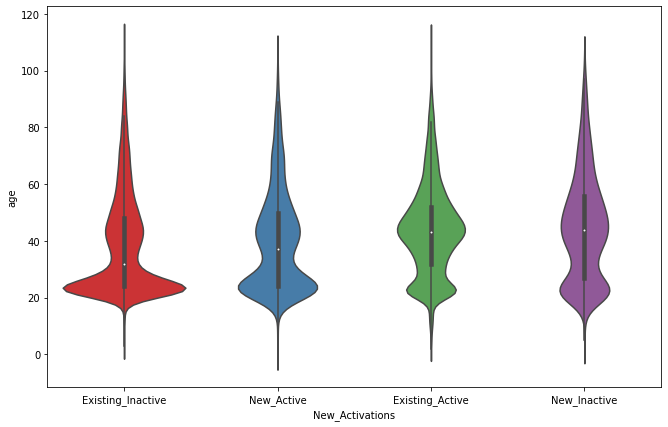

In [24]:
plt.figure(figsize=(11,7))
sns.violinplot(data = Cust_df, x='New_Activations',y= 'age', palette='Set1')

Scatterplot reveals outlier exists in gross_income for customers who have been inactive throughout the analysis period

The below scatter plot shows outliers in gross income for customers whose behaviour has not changed,i.e. customers who remained inactive or active throughout the analysis period. This will require data wrangling to remove the outliers in case required to perform predictive analysis of customer behaviour.

<AxesSubplot:xlabel='New_Activations', ylabel='gross_income'>

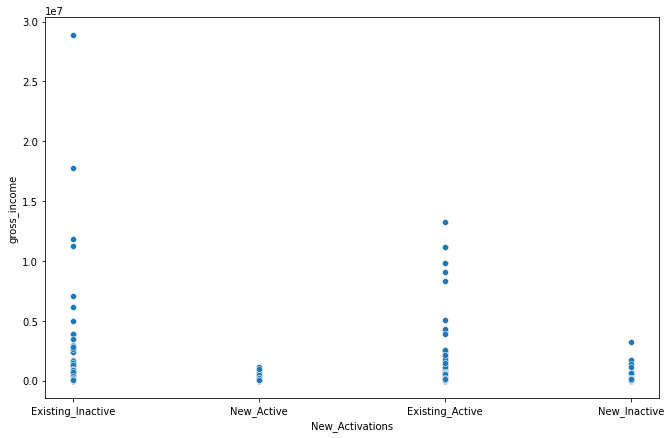

In [25]:
plt.figure(figsize=(11,7))
sns.scatterplot(data = Cust_df, x='New_Activations',y= 'gross_income', palette='Set1')

In [26]:
upper_limit = Cust_df['gross_income'].mean() + 3*Cust_df['gross_income'].std()
lower_limit = Cust_df['gross_income'].mean() - 3*Cust_df['gross_income'].std()

In [27]:
Cust_df['gross_income'] = np.where(
    Cust_df['gross_income']>upper_limit,
    upper_limit,
    np.where(
        Cust_df['gross_income']<lower_limit,
        lower_limit,
        Cust_df['gross_income']
    )
)

C:\Users\91998\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross_income', ylabel='Density'>

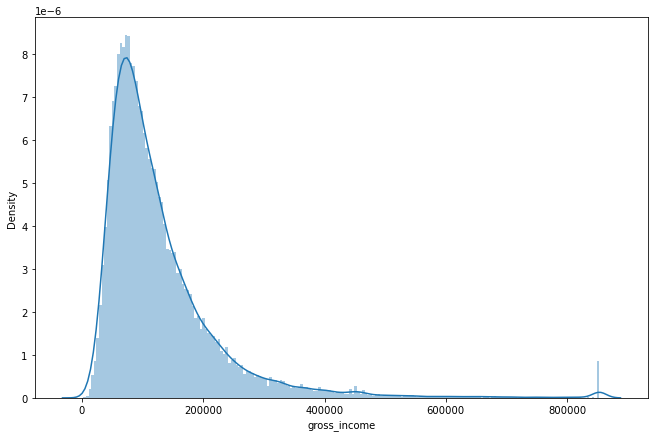

In [28]:
plt.figure(figsize=(11,7))
sns.distplot(Cust_df['gross_income'],bins=200)

Scatterplot reveals no outlier in customers age

Recheck of spread of gross income and any outlier existing

<AxesSubplot:xlabel='New_Activations', ylabel='age'>

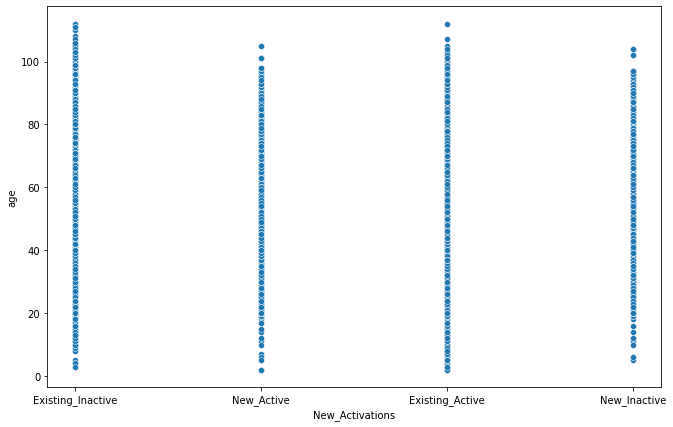

In [29]:
plt.figure(figsize=(11,7))
sns.scatterplot(data = Cust_df, x='New_Activations',y= 'age', palette='Set1')

Text(0, 0.5, 'No. of CUstomers')

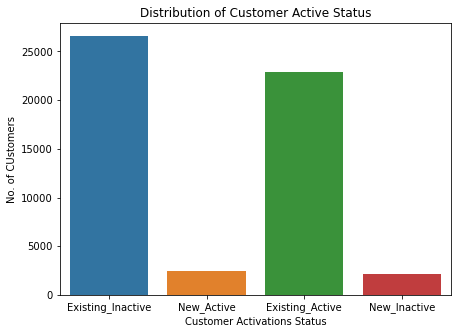

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x='New_Activations',data=Cust_df)
plt.title('Distribution of Customer Active Status')
plt.xlabel('Customer Activations Status')
plt.ylabel('No. of CUstomers')

In [31]:
Cust_df['New_Activations'].value_counts()

Existing_Inactive    26588
Existing_Active      22906
New_Active            2438
New_Inactive          2098
Name: New_Activations, dtype: int64

In [32]:
pv_Avg_Annual_Income = Cust_df.pivot_table(values='gross_income',index='gender',columns='New_Activations')

In [33]:
pv_Avg_Annual_Income

New_Activations,Existing_Active,Existing_Inactive,New_Active,New_Inactive
gender,,,,
F,136678.879840,125845.294814,126459.177794,134043.031756
M,138234.176422,121302.593255,118874.706161,124615.141455


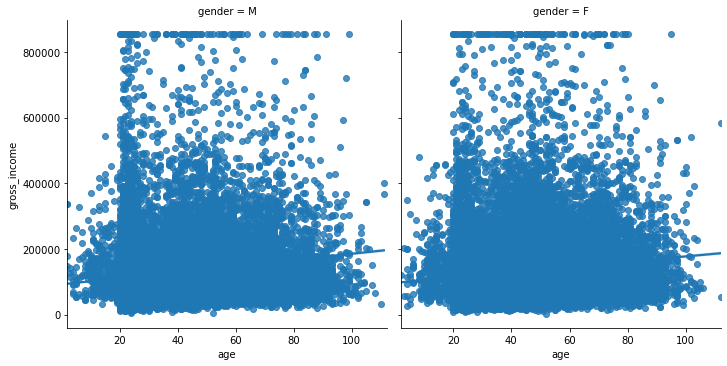

In [34]:
sns.lmplot(x='age',y='gross_income',data=Cust_df,col='gender')

In [35]:
Cust_df.gross_income.mean()

129675.92309646349

In [36]:
Cust_df.loc[(Cust_df.gross_income > Cust_df.gross_income.mean()), 'gross_income_1'] = 'gross_income_more_than_avg'
Cust_df.loc[(Cust_df.gross_income < Cust_df.gross_income.mean()), 'gross_income_1'] = 'gross_income_less_than_avg'

<AxesSubplot:xlabel='New_Activations', ylabel='count'>

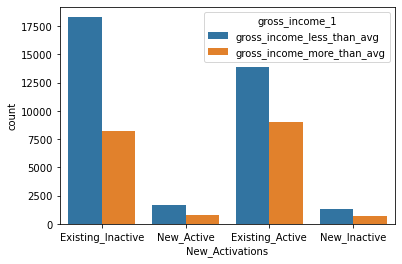

In [37]:
sns.countplot(x='New_Activations',hue = 'gross_income_1', data=Cust_df)

What is the relationship between the number of products owned by customers who
were active at the start and at the end vs those who were active at the start but were

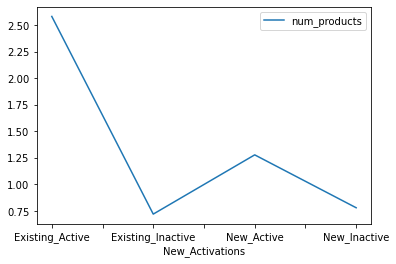

In [38]:
pivot = pd.pivot_table(Cust_df,values = 'num_products',index = 'New_Activations', aggfunc = np.mean).plot()

In [39]:
num_products_summary = Cust_df[['num_products','New_Activations']]

In [40]:
num_products_summary.groupby('New_Activations')['num_products'].mean()

New_Activations
Existing_Active      2.580634
Existing_Inactive    0.719498
New_Active           1.277276
New_Inactive         0.779314
Name: num_products, dtype: float64

In [41]:
num_products_summary.describe()

,num_products
count,54030.000000
mean,1.536017
std,1.578848
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


C:\Users\91998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

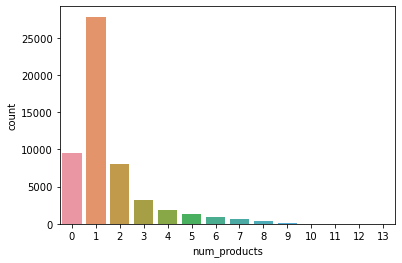

In [42]:
sns.countplot(Cust_df['num_products']).unique()